In [9]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [10]:
data = Table.read('filtered.tbl',format='ipac')
print(data.colnames)
print (len(data))

['designation', 'tmass_designation', 'tmass_cntr', 'l', 'b', 'dl', 'db', 'ra', 'dec', 'dra', 'ddec', 'csf', 'mag_J', 'dJ_m', 'mag_H', 'dH_m', 'mag_Ks', 'dKs_m', 'mag3_6', 'd3_6m', 'mag4_5', 'd4_5m', 'mag5_8', 'd5_8m', 'mag8_0', 'd8_0m']
607902


In [11]:
band4_5 = data['mag4_5']
band5_8 = data['mag5_8']
band3_6 = data['mag3_6']
band8_0 = data['mag8_0']

In [12]:
a = band4_5-band8_0
b = band3_6-band5_8
PAH_index_1 = []
for i in range(0,len(data)):
    if b[i] < 1.5:
        if a[i]>1:
            if b[i]<(1.5/2)*(a[i]-1):
                if band4_5[i] > 11.5:
                    if data['d3_6m'][i]<0.2:
                        if data['d4_5m'][i]<0.2:
                            if data['d5_8m'][i]<0.2:
                                if data['d8_0m'][i]<0.2:
                                    PAH_index_1.append(i)

In [13]:
PAH1 = data[PAH_index_1]
PAH1.write('test2.tbl',format='ipac')


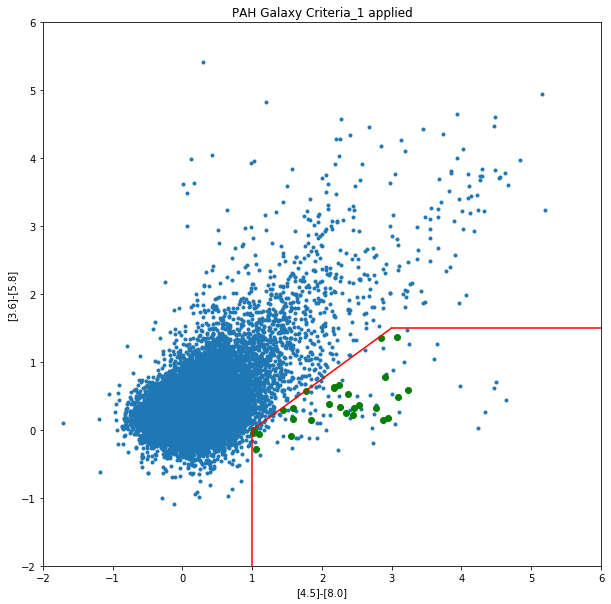

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(a,b,marker = '.')
plt.scatter(a[PAH_index_1],b[PAH_index_1], color = 'g')
plt.plot([3, 6], [1.5, 1.5], 'k-', color = 'r') #[3.6] − [5.8] < 1.5
plt.plot([1,1],[-3,0] , color = 'r') #[4.5] − [8.0] > 1
###[3.6] − [5.8] <(1.5/2) × ([4.5] − [8.0] − 1)###
def fit(t):
    return (1.5/2)*(t-1)
x = np.arange(1,3.1,0.1)
plt.plot(x,fit(x),color = 'r')
###
plt.xlim(-2, 6)
plt.ylim(-2, 6)
plt.xlabel('[4.5]-[8.0]')
plt.ylabel('[3.6]-[5.8]')
plt.title('PAH Galaxy Criteria_1 applied')

data.remove_rows(PAH_index_1)
data.write('test5.tbl',format='ipac')